# Enhancing Early Detection of Parkinson's Disease Through Acoustic Analysis

### By Mikhail Vorotnikov, Maksim Artemev, Heriberto Lopez, Andy Chen

### 1. Import Libraries

In [5]:
import numpy as np 
import pandas as pd

In [6]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, mean_absolute_error, r2_score, precision_score, recall_score,  mean_squared_error, roc_auc_score, roc_curve, ConfusionMatrixDisplay

### 2. Data acquisition 

In [8]:
df = pd.read_csv('Input/pd_speech_features.csv') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


### 3. Data Overview

In [9]:
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [10]:
df.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [11]:
df.columns

Index(['id', 'gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       ...
       'tqwt_kurtosisValue_dec_28', 'tqwt_kurtosisValue_dec_29',
       'tqwt_kurtosisValue_dec_30', 'tqwt_kurtosisValue_dec_31',
       'tqwt_kurtosisValue_dec_32', 'tqwt_kurtosisValue_dec_33',
       'tqwt_kurtosisValue_dec_34', 'tqwt_kurtosisValue_dec_35',
       'tqwt_kurtosisValue_dec_36', 'class'],
      dtype='object', length=755)

### 4. Exploratory Data Analysis

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


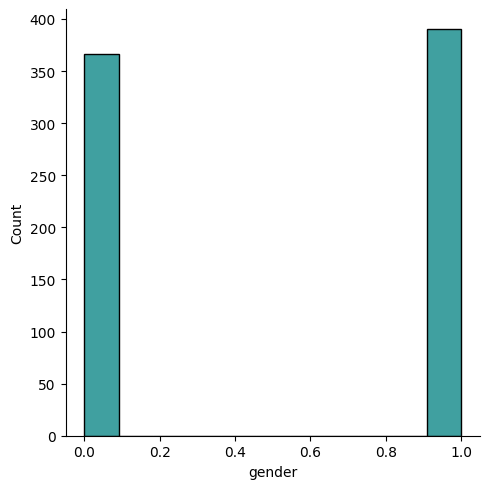

In [12]:
sns.displot(df["gender"], color = "Teal");


c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


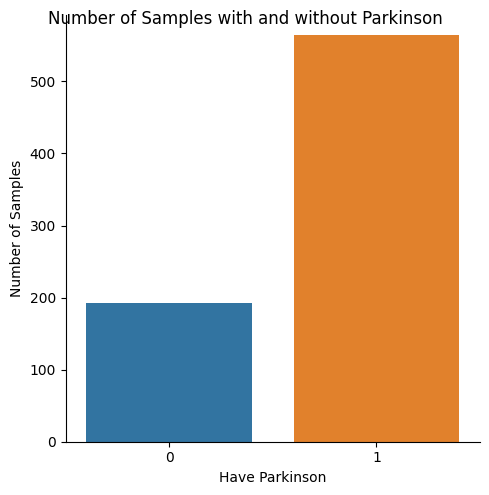

In [13]:
sns.set_palette("tab10")
a = sns.catplot(x='class', data=df, kind='count')
a.fig.suptitle('Number of Samples with and without Parkinson')
a.set(ylabel='Number of Samples', xlabel='Have Parkinson')
plt.show()

In [14]:
labels = ["No Parkinson","Diagnosed with Parkinson"]

have_or_not = df["class"].value_counts().tolist()
values = [have_or_not[0], have_or_not[1]]

fig = px.pie(values = df["class"].value_counts(), names = labels, color_discrete_sequence = ["blue", "violet"], title = "Percentage of samples with and without Parkinson")
fig.show()

In [15]:
df['class']==1

0       True
1       True
2       True
3       True
4       True
       ...  
751    False
752    False
753    False
754    False
755    False
Name: class, Length: 756, dtype: bool

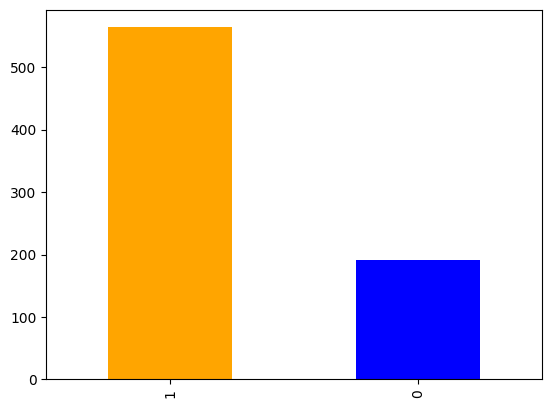

In [16]:
df["class"].value_counts().plot(kind = "bar", color = ["orange", "blue"]);

C:\Users\Andy\AppData\Local\Temp\ipykernel_30688\2092814234.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




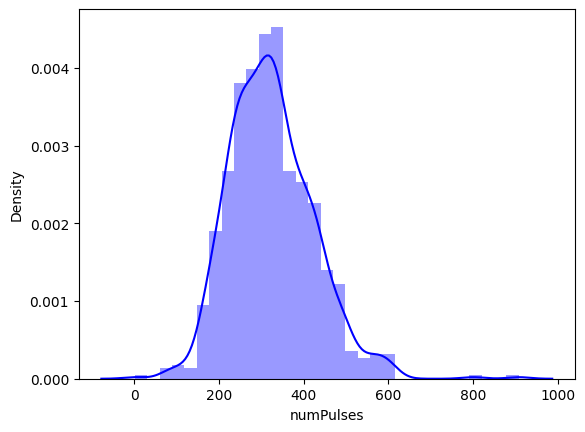

In [17]:
sns.distplot(df["numPulses"], color = "blue");

In [18]:
df["numPulses"]

0      240
1      234
2      232
3      178
4      236
      ... 
751    417
752    415
753    381
754    340
755    340
Name: numPulses, Length: 756, dtype: int64

C:\Users\Andy\AppData\Local\Temp\ipykernel_30688\4121193736.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




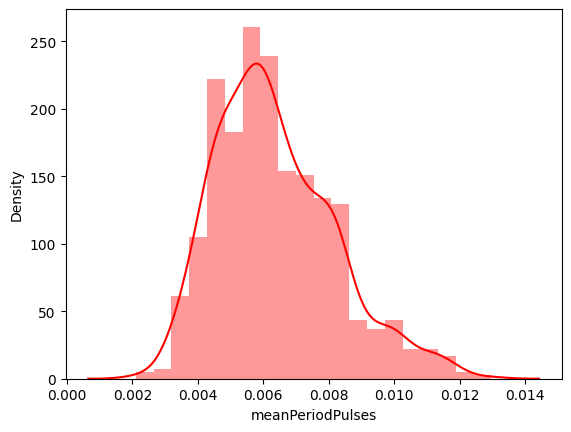

In [19]:
sns.distplot(df["meanPeriodPulses"], color = "red");

## Model Development

### 1. Model Training

In [20]:
def evaluate(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)

    return model_scores

In [21]:
X = df.iloc[:, 56:140]
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [23]:
from xgboost import XGBClassifier
models = {
            "Linear SVM": LinearSVC(),
            "Random Forest": RandomForestClassifier(),
            "KNeighborsClassifier": KNeighborsClassifier(),
            "Bagging Classifier": BaggingClassifier(),
            
         }

In [48]:
model_scores = evaluate(models = models,
                        X_train = X_train,
                        X_test = X_test,
                        y_train = y_train,
                        y_test = y_test)

model_scores

c:\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

c:\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



AttributeError: 'Flags' object has no attribute 'c_contiguous'

### 2. Model Evaluation

In [49]:
model_scores = model_scores.values()
model_scores = list(model_scores)

svc = model_scores[0]
random_forest = model_scores[1]
neighbors = model_scores[2]
bagging = model_scores[3]

NameError: name 'model_scores' is not defined

In [ ]:
model_scores


[0.8092105263157895, 0.868421052631579, 0.875, 0.8355263157894737]

In [ ]:
print(f"Linear SVC: {svc * 100:.2f}%")
print(f"Random Forest Classifier: {random_forest * 100:.2f}%")
print(f"KNeighbors Classifier: {neighbors * 100:.2f}%")
print(f"Bagging Classifier: {bagging * 100:.2f}%")

Linear SVC: 80.92%
Random Forest Classifier: 86.84%
KNeighbors Classifier: 87.50%
Bagging Classifier: 83.55%


### SVM

In [27]:
np.random.seed(42)

model = LinearSVC()
model.fit(X_train, y_train)

model.score(X_test, y_test)

c:\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

c:\Python311\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



0.8618421052631579

In [28]:
y_preds = model.predict(X_test)


In [29]:
def model_report(y_test, y_preds):
    print(f"Accuracy: {accuracy_score(y_test, y_preds) * 100:.2f}%")
    print(f"Precision: {precision_score(y_test, y_preds)}")
    print(f"Recall: {recall_score(y_test, y_preds)}")
    print(f"R2 Score: {r2_score(y_test, y_preds)}")
    print(f"F1 Score: {f1_score(y_test, y_preds)}")


In [30]:
model_report(y_test, y_preds)


Accuracy: 86.18%
Precision: 0.8615384615384616
Recall: 0.9739130434782609
R2 Score: 0.24982373678025838
F1 Score: 0.9142857142857143


### Random Vs Bagging

In [31]:
np.random.seed(42)

model = RandomForestClassifier(n_estimators = 100)
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.8552631578947368

In [32]:
y_preds = model.predict(X_test)


In [33]:
def model_report(y_test, y_preds):
    print(f"Accuracy: {accuracy_score(y_test, y_preds) * 100:.2f}%")
    print(f"Precision: {precision_score(y_test, y_preds)}")
    print(f"Recall: {recall_score(y_test, y_preds)}")
    print(f"R2 Score: {r2_score(y_test, y_preds)}")
    print(f"F1 Score: {f1_score(y_test, y_preds)}")


In [34]:
model_report(y_test, y_preds)


Accuracy: 85.53%
Precision: 0.8549618320610687
Recall: 0.9739130434782609
R2 Score: 0.2141010575793183
F1 Score: 0.9105691056910569


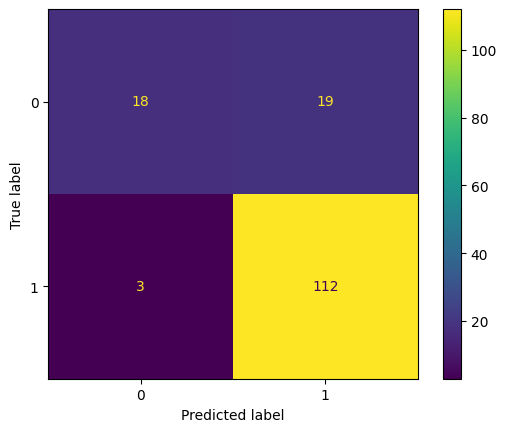

In [35]:
disp = ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds)
ax = disp.ax_
ax.grid(False)  
plt.show()

### Bagging

In [36]:
np.random.seed(42)

bagging_model = BaggingClassifier()
bagging_model.fit(X_train, y_train)

bagging_model.score(X_test, y_test)

0.8355263157894737

In [37]:
bagging_preds = bagging_model.predict(X_test)

In [38]:
model_report(y_test, bagging_preds)


Accuracy: 83.55%
Precision: 0.8688524590163934
Recall: 0.9217391304347826
R2 Score: 0.10693301997649807
F1 Score: 0.8945147679324895


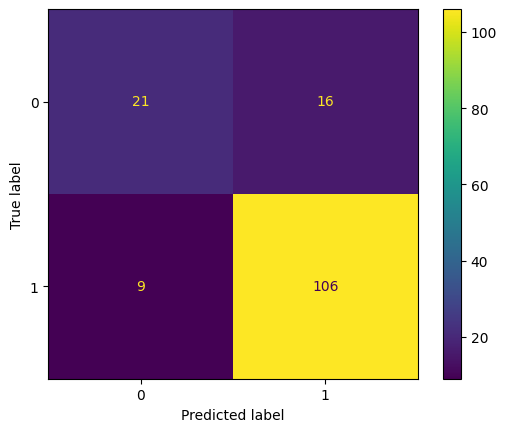

In [39]:
disp = ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=bagging_preds)
ax = disp.ax_
ax.grid(False)  
plt.show()

### Random forest wins

In [40]:
y_probs = model.predict_proba(X_test)
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.84, 0.59, 0.83, 0.25, 0.96, 0.96, 0.68, 0.98, 0.92, 0.65])

In [41]:
roc_auc_score(y_test, y_probs_positive)


0.9320799059929494

In [42]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color = "green", label = "ROC")

    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend();

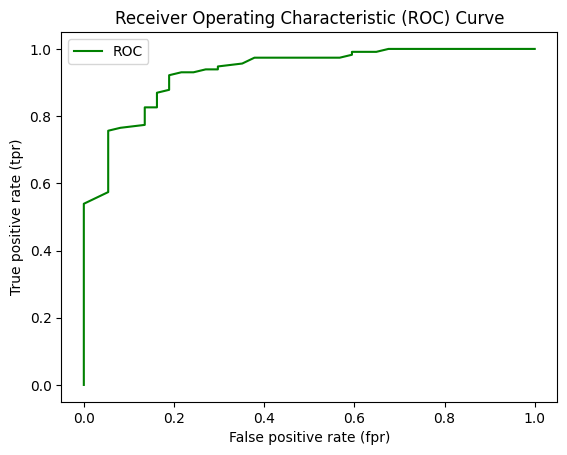

In [43]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)
plot_roc_curve(fpr, tpr)

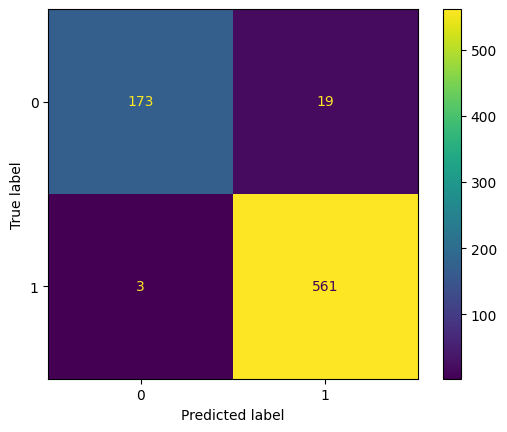

In [44]:
disp = ConfusionMatrixDisplay.from_estimator(estimator=model, X=X, y=y)
ax = disp.ax_
ax.grid(False)  
plt.show()

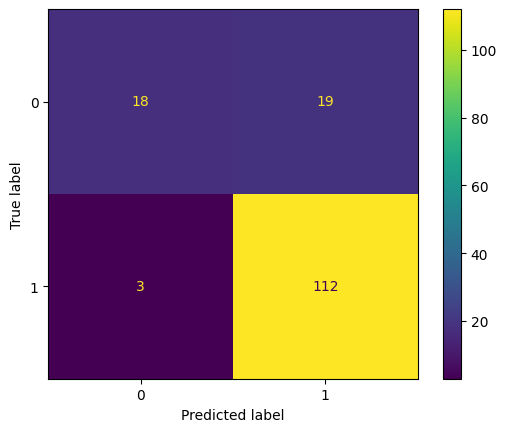

In [45]:
disp = ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds)
ax = disp.ax_
ax.grid(False)  
plt.show()

In [46]:
model_report(y_test, y_preds)

Accuracy: 85.53%
Precision: 0.8549618320610687
Recall: 0.9739130434782609
R2 Score: 0.2141010575793183
F1 Score: 0.9105691056910569


In [47]:
from joblib import dump

# Save the model to a file
dump(model, 'model.joblib')

['model.joblib']